In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data/beirut-era-rhia-daily.csv')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data.head()

,value
date,
2000-06-01,0.004116
2000-06-02,0.002178
2000-06-03,0.927250
2000-06-04,0.824301
2000-06-05,0.004131


In [3]:
precip = pd.read_csv('data/40100.csv')
precip['date'] = pd.to_datetime(precip['date'], format='%Y-%m-%d')
# drop zeros
precip = precip[precip['value'] > 0]
precip.head()

,date,value
132,2000-10-11,4.1
145,2000-10-24,16.0
182,2000-11-30,37.1
194,2000-12-12,5.1
195,2000-12-13,17.0


In [4]:
# Select the rows from data where date exists in precip
data = data[data.index.isin(precip['date'])]
data.head()

,value
date,
2000-10-11,2.355795
2000-10-24,37.647169
2000-11-30,16.699823
2000-12-12,58.708712
2000-12-13,36.151603


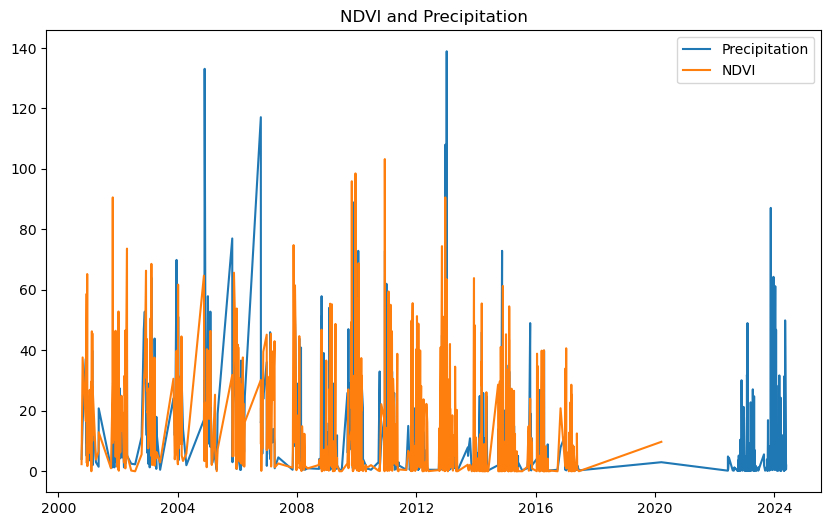

In [5]:
# Plot the value
plt.figure(figsize=(10, 6))
# plot precip and ndvi
plt.plot(precip['date'], precip['value'], label='Precipitation')
plt.plot(data.index, data['value'], label='NDVI')
plt.legend()
plt.title('NDVI and Precipitation')
plt.show()